## 실습

### 한국어 문법 문제 생성 프로그램 만들기

- 입력 데이터(관리자) : 제공된 pdf 파일, konlpy 에서 제공하는 샘플데이터, 한국어 구텐부르크 프로젝트, 크롤링 등
- 입력 데이터(사용자) : 문제의 정답
- 출력 데이터 : 정오답 여부, 실제 정답
- 문제를 여러 개 풀  수 있어야 한다. (기본 10문제)
- 한 차례 문제를 푼 뒤에는, 총점을 확인할 수 있어야 한다.
- 틀린 문제는 실제 정답이 무어엇인지 알 수 있어야 한다.
- 일반 사용자가 사용한다고 가정하고 제작한다.(설명이 있어야한다.)
- 문제는 랜덤하게 출제되어야 한다.
- 개발자가 아닌 관리자가 입력 데이터를 자유롭게 추가할 수 있어야 한다.
- 사용자가 입력한 답, 정오답 여부, 문제를 푼 시간, 출제된 문제 정보는 로그가 기록되어야 한다.
- 제출파일 : 프로그램 / 사용설명서
  
- 예시
  - ex) 초등 국어 형성 평가 느낌
  - 오늘 아침을 먹었습니다. 라는 문장에서 동사는 무엇인가요?


리스트에 문장 넣고

문장별 형태소 분리해서

그걸 다시 리스트에 넣고 (문제 추가 및 총 문제수 표시)

문제는 셔플 돌려서 랜덤 돌리고 맞추면 리스트에서 제거 (문제 제거)

In [1]:
import nltk
from ckonlpy.tag import Twitter

In [2]:
tokenizer = Twitter()

/opt/anaconda3/lib/python3.12/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
grammar = '''
NP:{<N.*>*<Suffix>?} #명사, N.* 뒤에 모든게 만족한다. 뒤에 *는 0개 이상오면 된다. Suffix 접미사
VP:{<V.*>*} #동사
AP:{<A.*>*} #형용사
조사:{<Jo.*>*} #조사
'''

In [4]:
parser = nltk.RegexpParser(grammar=grammar)
chunks = parser.parse(tokenizer.pos('오늘은 아침을 먹었습니다.'))

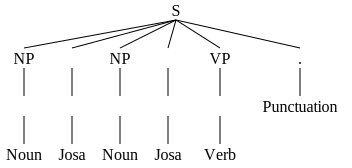

In [5]:
chunks